<a href="https://colab.research.google.com/github/JainAnki/SiameseNetworks/blob/main/BMD_Asgn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1 - Spirometry

---

###We have been provided data of three different subjects performing foeced expiration on a spirometer

###Parameters that can be extracted from the dataset are as follows:

> **FEV1:** Forced Expiratory Volume in the 1st one second

> **FVC::** Forced Vital Capacity

> **FEV1/FVC Ratio**

> **Flow Volume Loop** Flow (L/sec) vs Volume(L)






In [31]:
%matplotlib inline

In [32]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import pandas as pd
import math

In [33]:
headers = ["FlowRate"]
X_1 = np.matrix(genfromtxt("/content/subj1.txt"))
df1 = pd.DataFrame(X_1.T, columns = headers).apply(pd.to_numeric)

X_2= np.matrix(genfromtxt("/content/subj2.txt"))
df2 = pd.DataFrame(X_2.T, columns = headers).apply(pd.to_numeric)

X_3 = np.matrix(genfromtxt("/content/subj3.txt"))
df3 = pd.DataFrame(X_3.T, columns = headers).apply(pd.to_numeric)

In [34]:
FEV1 = [0]
FEV1.append(df1[0:500].mean())
FEV1.append(df1[0:500].mean() + df1[500:1000].mean())
FEV1.append(df1[0:500].mean() + df1[500:1000].mean() + df1[1000:1500].mean())
FEV1.append(df1[0:500].mean() + df1[500:1000].mean() + df1[1000:1500].mean() + df1[1500:2000].mean())

FEV2 = [0]
FEV2.append(df2[0:500].mean())
FEV2.append(df2[0:500].mean() + df2[500:1000].mean())
FEV2.append(df2[0:500].mean() + df2[500:1000].mean() + df2[1000:1500].mean())
FEV2.append(df2[0:500].mean() + df2[500:1000].mean() + df2[1000:1500].mean() + df2[1500:2000].mean())

FEV3 = [0]
FEV3.append(df3[0:500].mean())
FEV3.append(df3[0:500].mean() + df3[500:1000].mean())
FEV3.append(df3[0:500].mean() + df3[500:1000].mean() + df3[1000:1500].mean())
FEV3.append(df3[0:500].mean() + df3[500:1000].mean() + df3[1000:1500].mean() + df3[1500:2000].mean())

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


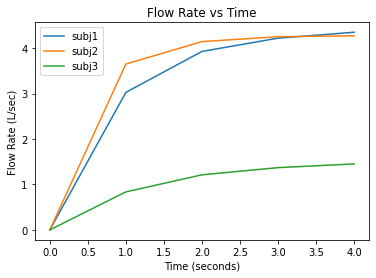

In [35]:
plt.plot(FEV1, label = 'subj1')
plt.plot(FEV2, label = 'subj2')
plt.plot(FEV3, label = 'subj3')
#plt.yticks([0,3.02682,3.927908,4.219496,4.349946])
plt.xlabel("Time (seconds)")
plt.ylabel("Flow Rate (L/sec)")
plt.title("Flow Rate vs Time")

plt.legend()


##Computing FEV1, FVC and FEV1/FVC ratio for the three subjects

In [36]:
FEV11 = FEV1[1]
FVC11 = FEV1[4]
R1 = (FEV11/FVC11)*100

FEV21 = FEV2[1]
FVC21 = FEV2[4]
R2 = (FEV21/FVC21)*100

FEV31 = FEV3[1]
FVC31 = FEV3[4]
R3 = (FEV31/FVC31)*100
print("FEV1 values:")
display(FEV11, FEV21, FEV31)
print("\n","FVC values:")
display(FVC11, FVC21, FVC31)
print("\n","FEV1/FVC ratio values:")
display(R1, R2, R3)

FEV1 values:


FlowRate    3.02682
dtype: float64

FlowRate    3.650706
dtype: float64

FlowRate    0.83686
dtype: float64


 FVC values:


FlowRate    4.349946
dtype: float64

FlowRate    4.271376
dtype: float64

FlowRate    1.452608
dtype: float64


 FEV1/FVC ratio values:


FlowRate    69.582933
dtype: float64

FlowRate    85.469085
dtype: float64

FlowRate    57.610863
dtype: float64

##Plotting the Flow Volume loop

In [37]:
x11 = pd.DataFrame([df1.max()]).max().apply(np.ceil)
x21 = pd.DataFrame([df2.max()]).max().apply(np.ceil)
x31 = pd.DataFrame([df3.max()]).max().apply(np.ceil)
x11 = int(x11)
x21 = int(x21)
x31 = int(x31)

x12 = pd.DataFrame([df1.min()]).min().apply(np.floor)
x22 = pd.DataFrame([df2.min()]).min().apply(np.floor)
x32 = pd.DataFrame([df3.min()]).min().apply(np.floor)
x12 = int(x12)
x22 = int(x22)
x32 = int(x32)

X1 = pd.DataFrame(np.arange(x11,x12,-8/2000))
X2 = pd.DataFrame(np.arange(x21,x22,-11/2000))
X3 = pd.DataFrame(np.arange(x31,x32,-3/2000))

X1 = X1[0:2000]
X2 = X2[0:2000]
X3 = X3[0:2000]

y1 = pd.DataFrame(df1["FlowRate"])
y2 = pd.DataFrame(df2["FlowRate"])
y3 = pd.DataFrame(df3["FlowRate"])

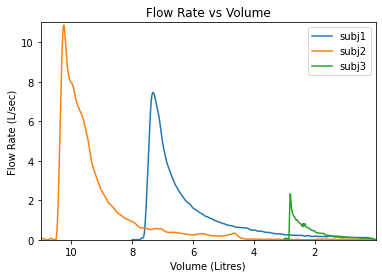

In [38]:
plt.plot(X1.iloc[:,0], y1, label = 'subj1')
plt.plot(X2.iloc[:,0], y2, label = 'subj2')
plt.plot(X3.iloc[:,0], y3, label = 'subj3')
plt.axis([X2[0].max(),X2[0].min(), math.floor(y2.min()), math.ceil(y2.max())])
plt.xlabel("Volume (Litres)")
plt.ylabel("Flow Rate (L/sec)")
plt.title("Flow Rate vs Volume")
plt.legend()


In [39]:
display((df1.max()-df1["FlowRate"][459])/(df1.max()-df1.min()),
(df2.max()-df2["FlowRate"][459])/(df2.max()-df2.min()),
(df3.max()-df3["FlowRate"][459])/(df3.max()-df3.min()))

FlowRate    0.74869
dtype: float64

FlowRate    0.874678
dtype: float64

FlowRate    0.68256
dtype: float64

In [40]:
display((df1.max()-df1["FlowRate"][499]),
(df2.max()-df2["FlowRate"][499]),
(df3.max()-df3["FlowRate"][499]))

FlowRate    5.834
dtype: float64

FlowRate    9.762
dtype: float64

FlowRate    1.702
dtype: float64

In [41]:
display((df1.max()-df1.min()),
(df2.max()-df2.min()),
(df3.max()-df3.min()))

FlowRate    7.445
dtype: float64

FlowRate    10.86
dtype: float64

FlowRate    2.328
dtype: float64

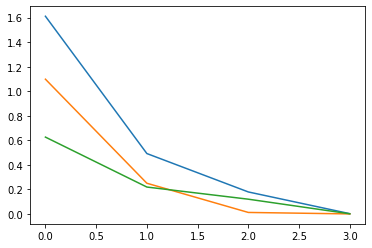

In [42]:
X1 = [df1["FlowRate"][499], df1["FlowRate"][999], df1["FlowRate"][1499], df1["FlowRate"][1999] ]
X2 = [df2["FlowRate"][499], df2["FlowRate"][999], df2["FlowRate"][1499], df2["FlowRate"][1999] ]
X3 = [df3["FlowRate"][499], df3["FlowRate"][999], df3["FlowRate"][1499], df3["FlowRate"][1999] ]
plt.plot(X1, label = 'subj1')
plt.plot(X2, label = 'subj2')
plt.plot(X3, label = 'subj3')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


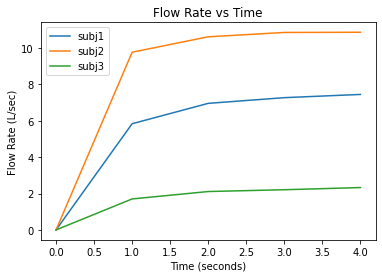

In [43]:

X11 = [0, (df1.max()-df1["FlowRate"][499]), (df1.max()-df1["FlowRate"][999]), (df1.max()-df1["FlowRate"][1499]), (df1.max()-df1["FlowRate"][1999])]
X22 = [0, (df2.max()-df2["FlowRate"][499]), (df2.max()-df2["FlowRate"][999]), (df2.max()-df2["FlowRate"][1499]), (df2.max()-df2["FlowRate"][1999])]
X33 = [0, (df3.max()-df3["FlowRate"][499]), (df3.max()-df3["FlowRate"][999]), (df3.max()-df3["FlowRate"][1499]), (df3.max()-df3["FlowRate"][1999])]
plt.plot(X11, label = 'subj1')
plt.plot(X22, label = 'subj2')
plt.plot(X33, label = 'subj3')

plt.xlabel("Time (seconds)")
plt.ylabel("Flow Rate (L/sec)")
plt.title("Flow Rate vs Time")
plt.legend()